In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path

import numpy as np
from scipy.spatial.transform import Rotation
from matplotlib import pyplot as plt

from ggcnn_grasp_planner_pckg.borrowed.datasets import YCBSimulationData
from ggcnn_grasp_planner_pckg.borrowed.postprocessing import World2ImgCoordConverter
from ggcnn_grasp_planner_pckg.ggcnn_grasp_planner import ggcnn_get_grasp

In [2]:
dataset = YCBSimulationData(
    Path("/home/moritz/Documents/ycb_sim_data_1")
)

In [3]:
sample = dataset[9]

print(sample.name)

010_banana


In [4]:
grasps = ggcnn_get_grasp(
    sample.depth,
    sample.cam_intrinsics,
    sample.cam_pos,
    Rotation.from_matrix(sample.cam_rot).as_quat()[[3, 0, 1, 2]],
    50,
    sample.segmentation,
)

In [5]:
grasps[0].position

array([ 0.4894478 , -0.10174736, -0.0190109 ])

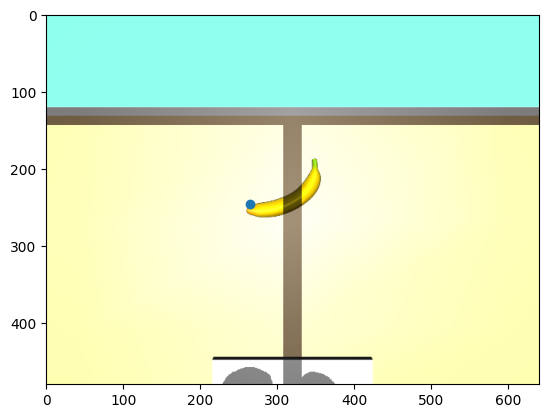

In [12]:
world2img = World2ImgCoordConverter()

p_world = grasps[0].position
p_world[1] = -p_world[1] 

p_img = world2img(
    p_world,
    sample.cam_intrinsics,
    sample.cam_rot,
    sample.cam_pos,
)

plt.imshow(sample.rgb)
plt.scatter(
    p_img[0],p_img[1],
)

[ 0.44899768 -0.07994435 -0.0190109 ]


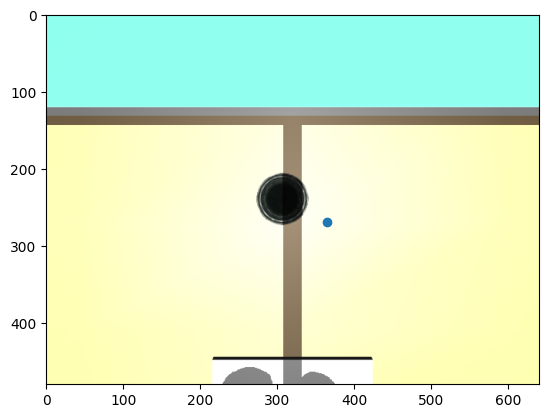

[ 0.59672853 -0.01635225 -0.0190109 ]


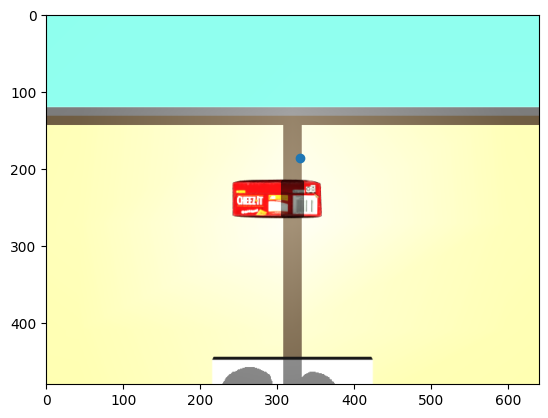

[ 0.57562412  0.04905676 -0.0190109 ]


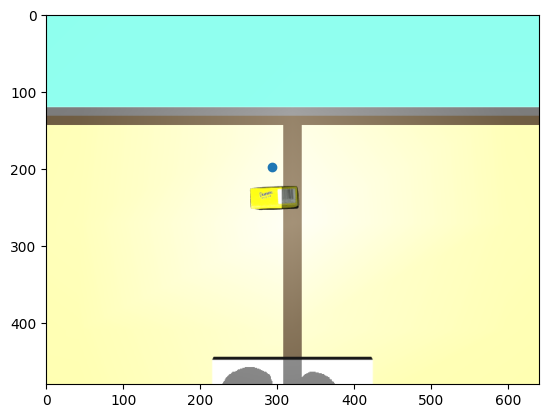

[ 0.47010209 -0.22893156 -0.0190109 ]


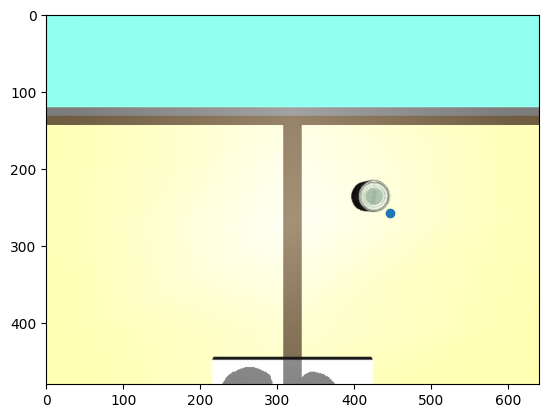

[ 0.42965198 -0.01453534 -0.0190109 ]


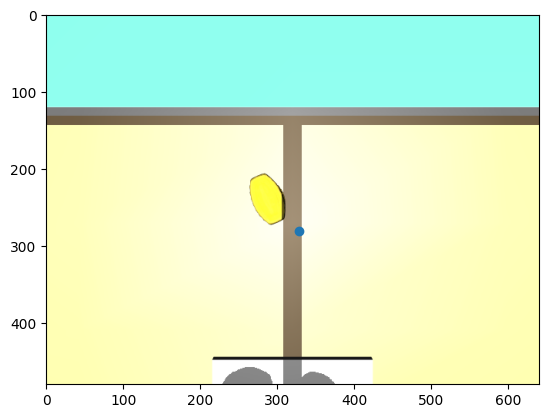

[ 0.44899768 -0.03633834 -0.0190109 ]


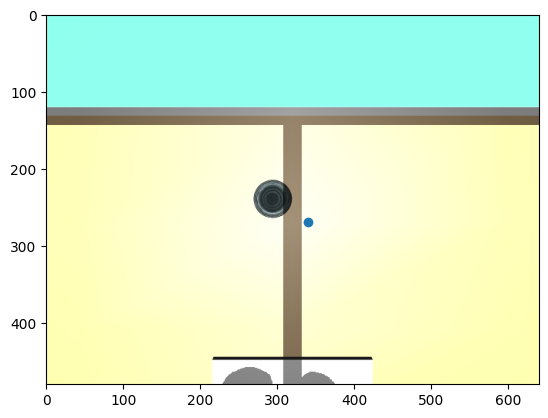

[ 0.38568446 -0.08176127 -0.0190109 ]


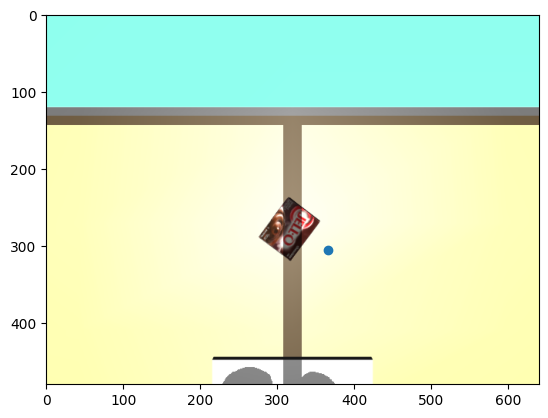

[ 0.57738282 -0.02543684 -0.0190109 ]


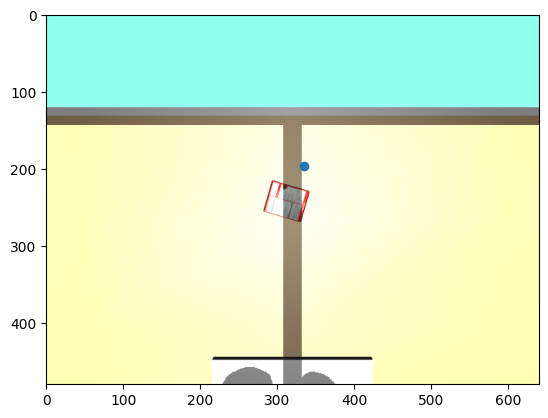

[ 0.42789328 -0.01453534 -0.0190109 ]


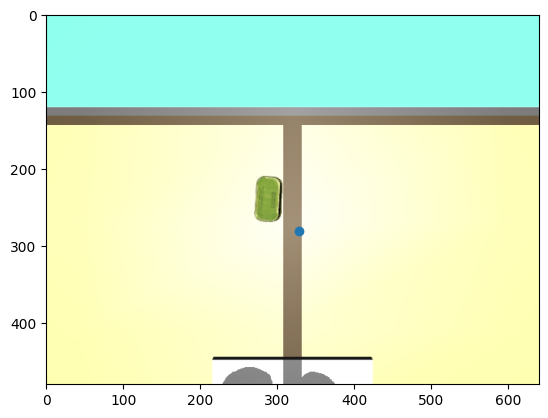

[ 0.4894478  -0.10174736 -0.0190109 ]


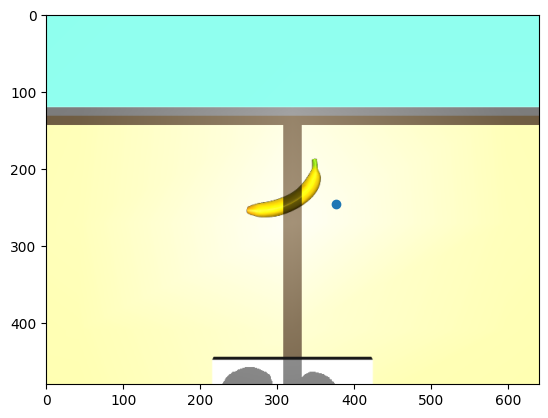

[ 0.42965198 -0.03633834 -0.0190109 ]


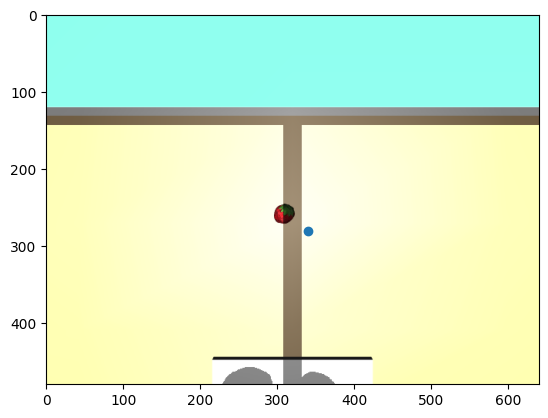

[ 0.44196288  0.09266277 -0.0190109 ]


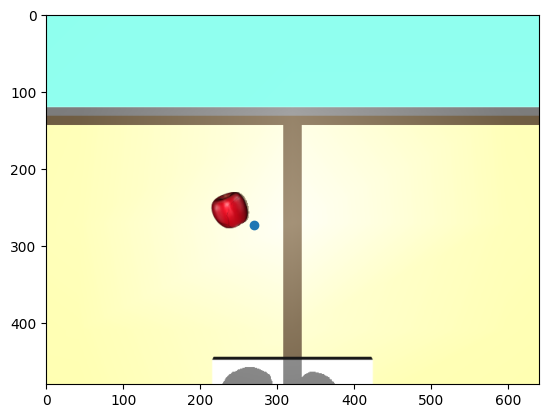

[ 0.45075638 -0.16715638 -0.0190109 ]


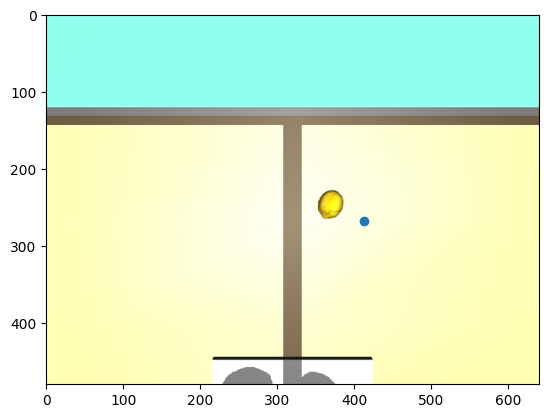

[ 0.4876891  -0.00908459 -0.0190109 ]


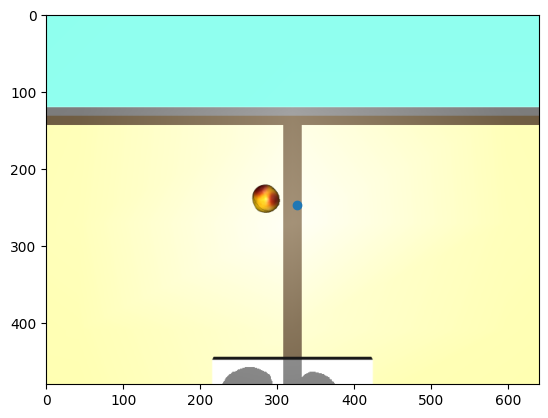

[ 0.66180045 -0.07085977 -0.0190109 ]


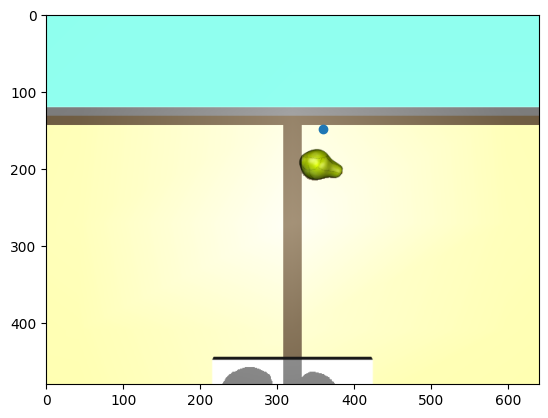

[ 0.47010209  0.00726767 -0.0190109 ]


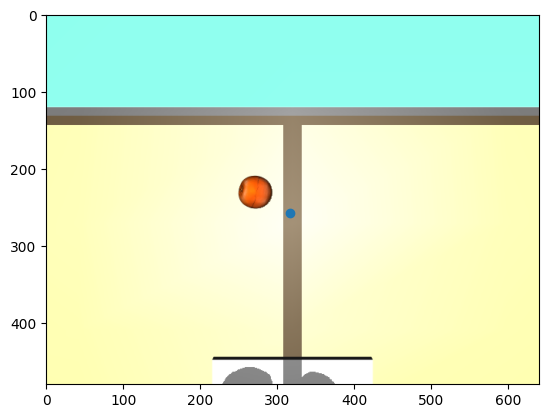

[ 0.40151277 -0.14717029 -0.0190109 ]


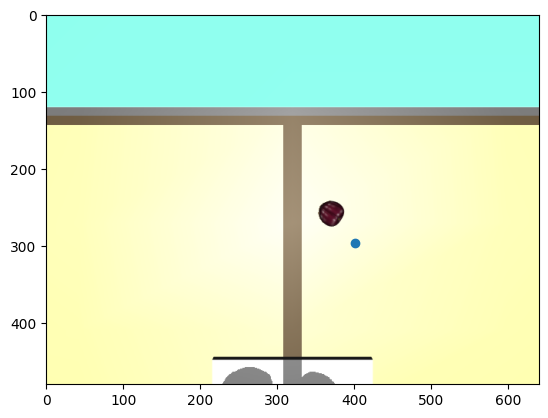

[ 0.70949029  0.15277048 -0.02000868]


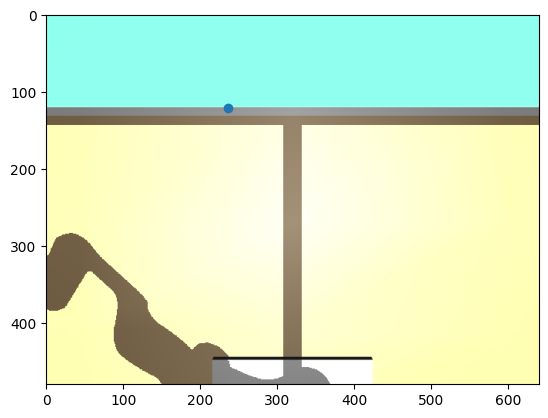

[ 0.41382367 -0.02180301 -0.0190109 ]


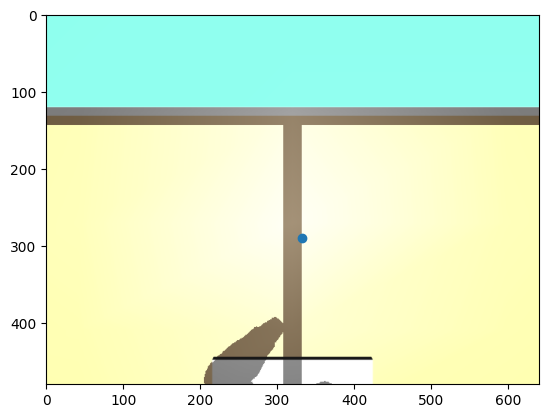

[ 0.70949029  0.19641919 -0.02000868]


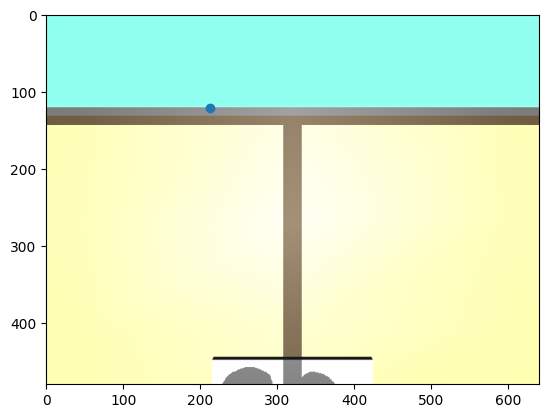

[ 0.44899768 -0.12355037 -0.0190109 ]


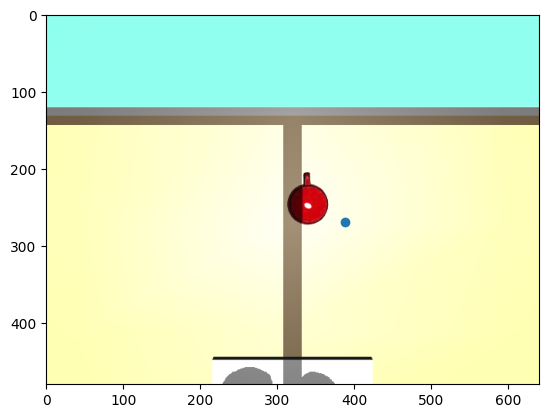

[ 0.54572621  0.05995827 -0.0190109 ]


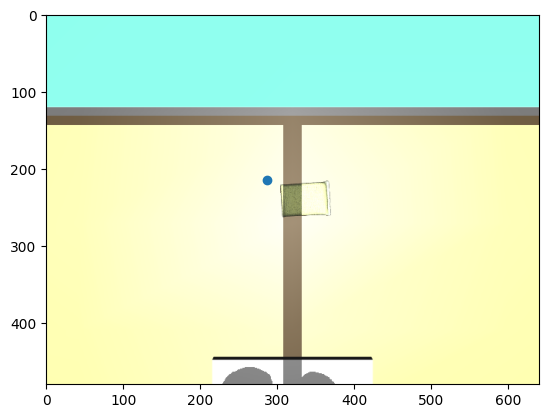

[ 0.4982413   0.15262104 -0.0190109 ]


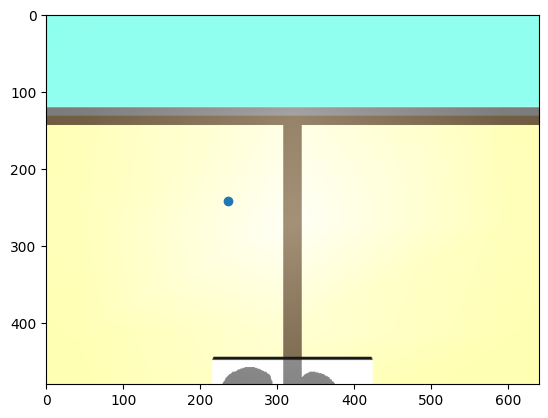

[ 0.32940605  0.04360601 -0.0190109 ]


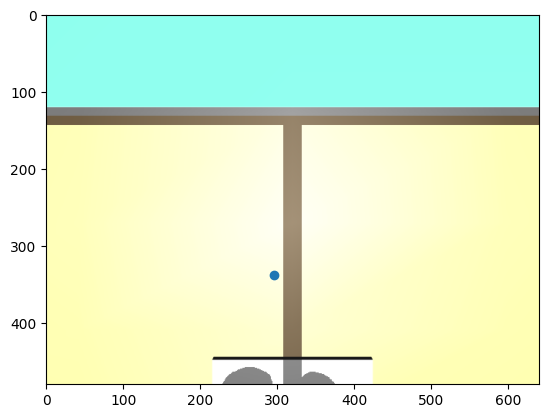

[ 0.38744316 -0.07994435 -0.0190109 ]


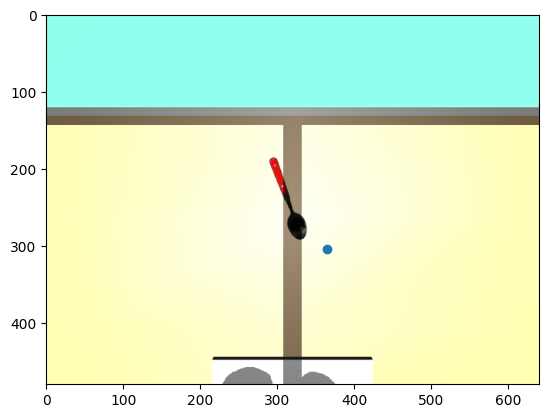

[ 0.36282136 -0.01635225 -0.0190109 ]


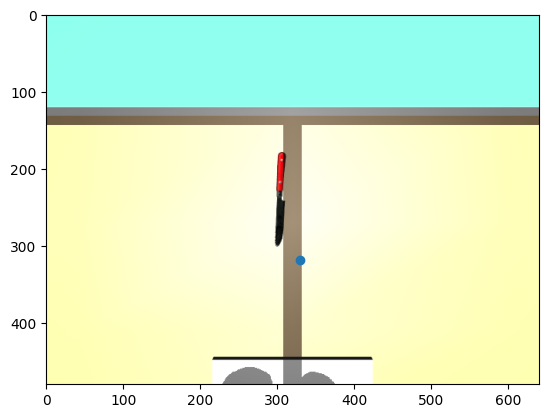

[ 0.52813921  0.13990262 -0.0190109 ]


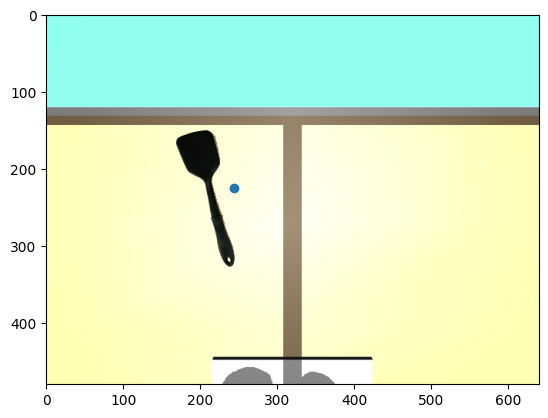

[ 0.61783294  0.00545075 -0.0190109 ]


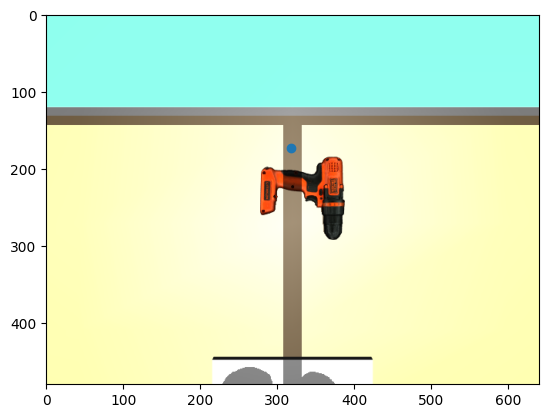

[ 0.42789328 -0.07994435 -0.0190109 ]


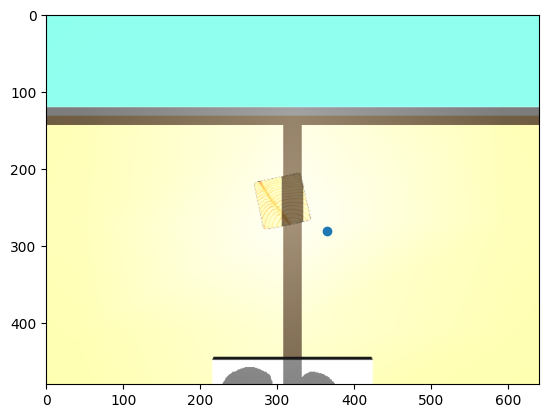

[ 0.44723898 -0.10356428 -0.0190109 ]


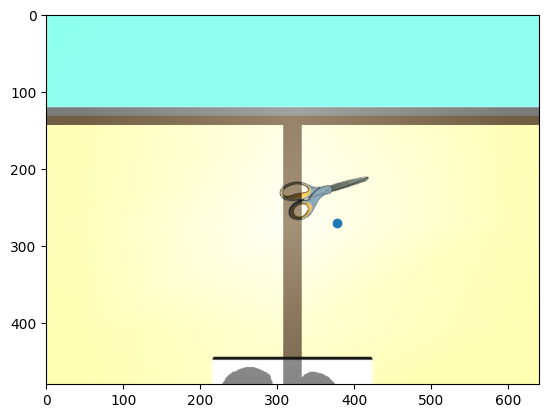

[ 0.47186079 -0.10174736 -0.0190109 ]


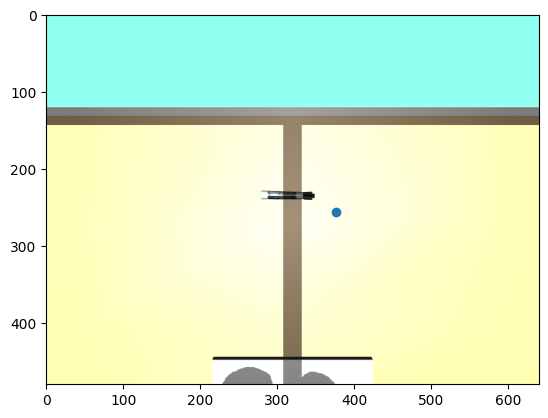

[ 0.57386542  0.12173345 -0.0190109 ]


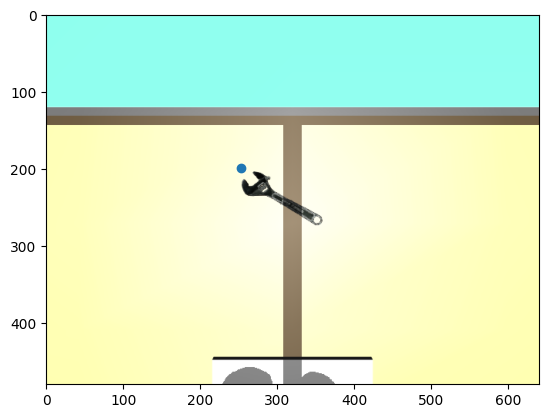

[ 0.5087935  -0.05995827 -0.0190109 ]


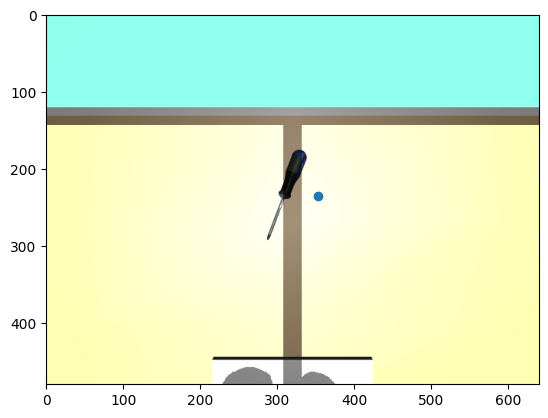

[ 0.66180045 -0.00545075 -0.0190109 ]


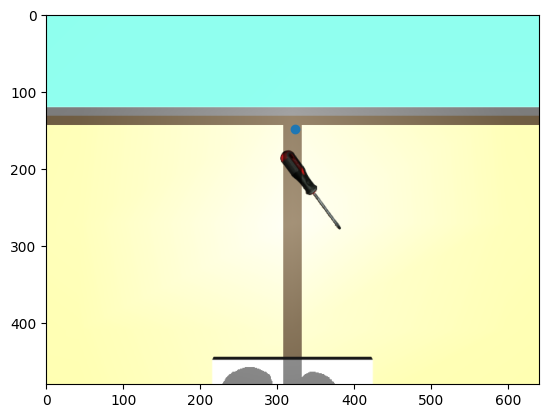

[ 0.32940605  0.08721202 -0.0190109 ]


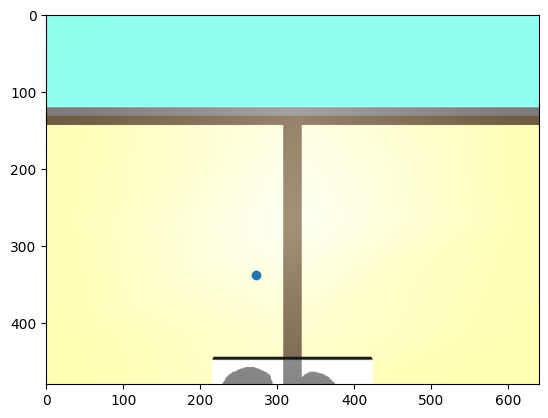

[ 0.44899768 -0.03633834 -0.0190109 ]


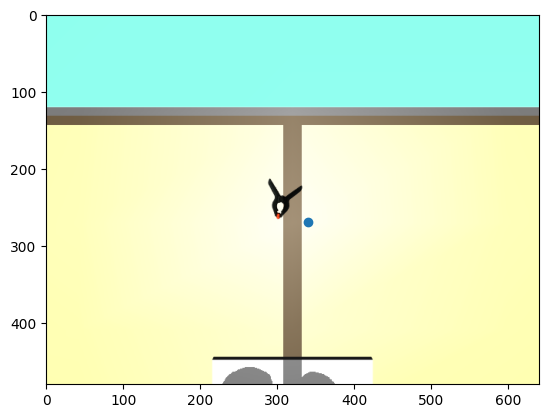

[ 0.92523053 -0.09685498 -0.9400264 ]


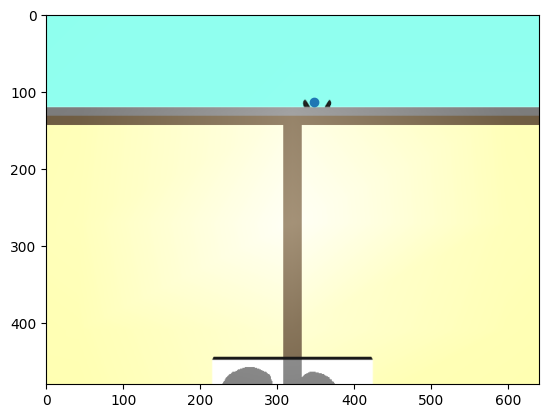

[ 0.40327147 -0.01635225 -0.0190109 ]


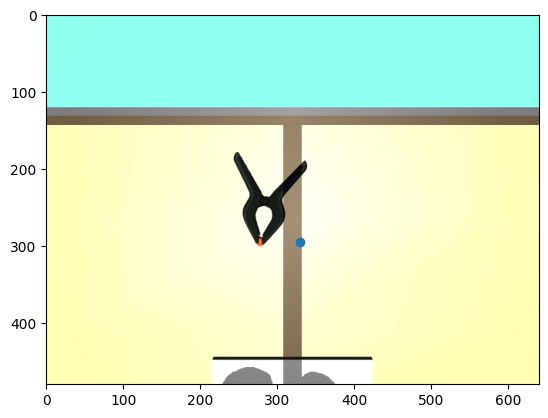

[ 0.44899768 -0.14535337 -0.0190109 ]


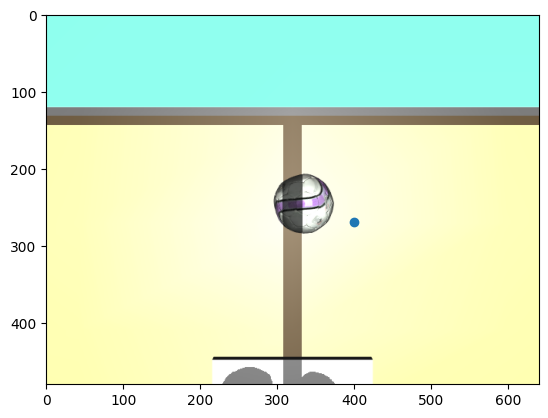

[ 0.38392576 -0.12355037 -0.0190109 ]


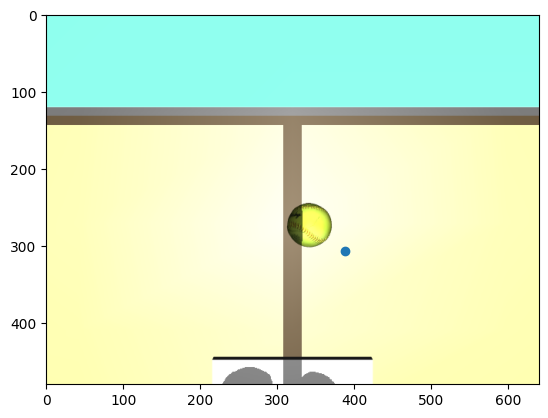

[ 0.40678887  0.00726767 -0.0190109 ]


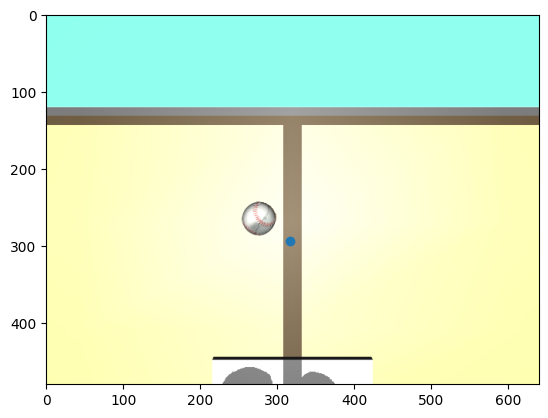

[ 0.47010209  0.00726767 -0.0190109 ]


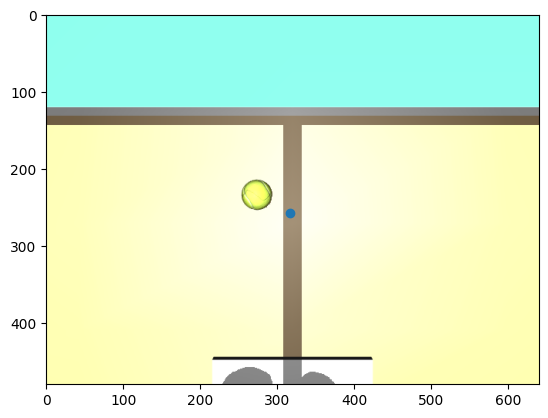

[ 0.47186079  0.22529773 -0.0190109 ]


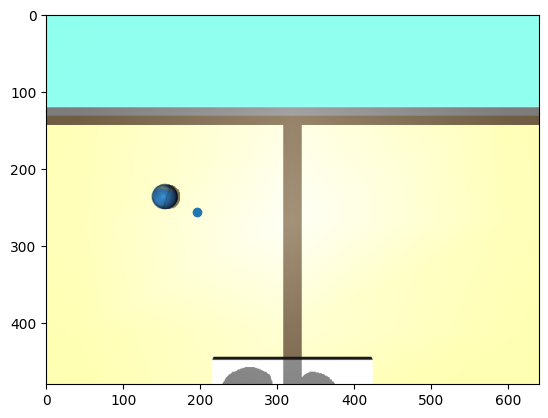

[ 0.47010209  0.00726767 -0.0190109 ]


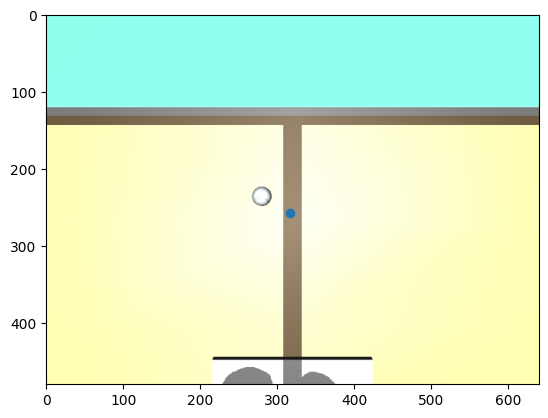

[ 0.64069605 -0.13626879 -0.0190109 ]


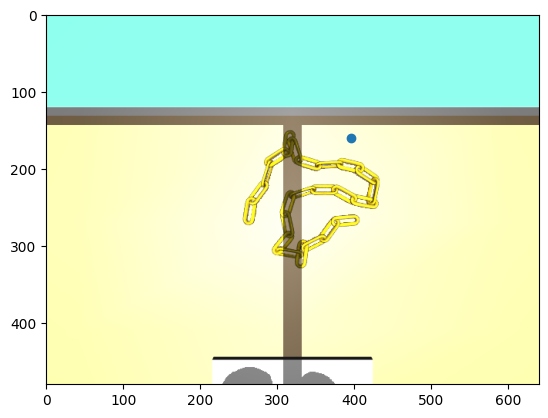

[ 0.5123109  -0.11991653 -0.0190109 ]


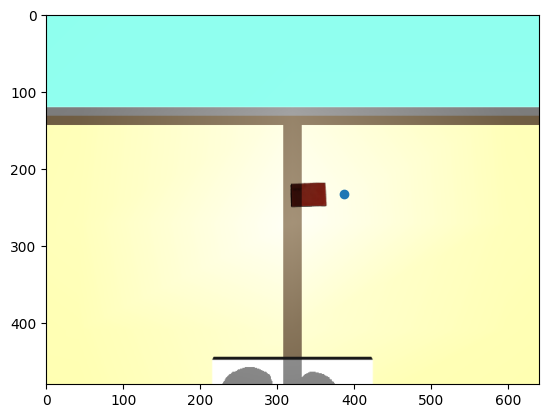

[ 0.55627842 -0.04905676 -0.0190109 ]


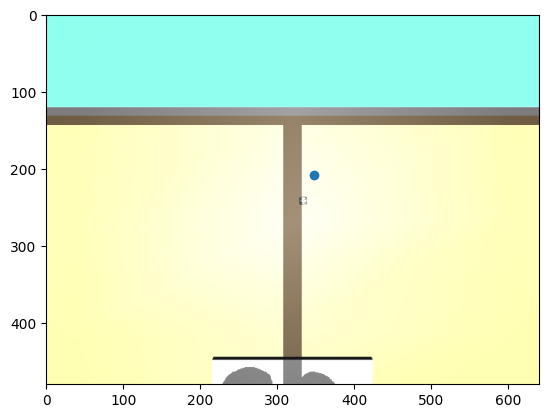

[ 0.5070348  -0.14535337 -0.0190109 ]


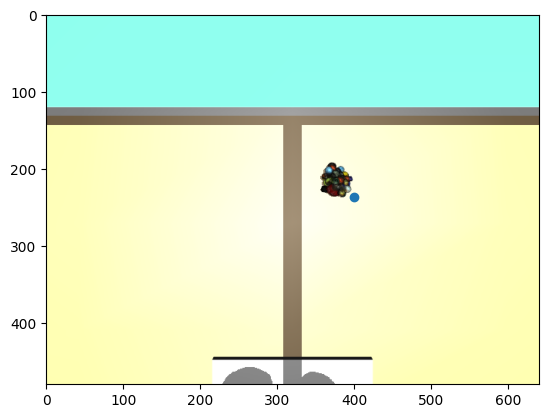

[ 0.4912065   0.02907067 -0.0190109 ]


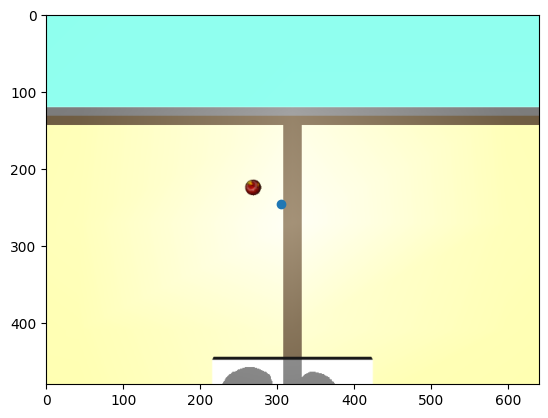

[ 0.57738282  0.08176127 -0.0190109 ]


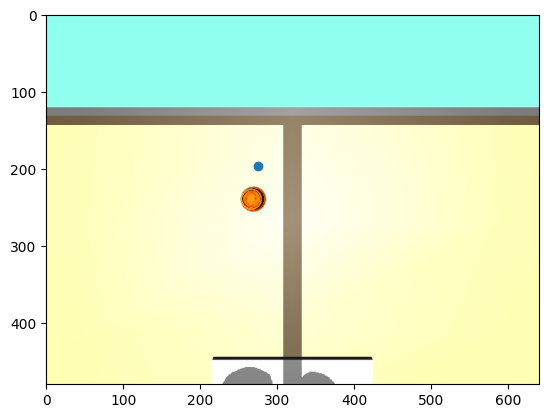

In [16]:
for i in range(50):
    sample = dataset[i]
    grasps = ggcnn_get_grasp(
        sample.depth,
        sample.cam_intrinsics,
        sample.cam_pos,
        Rotation.from_matrix(sample.cam_rot).as_quat()[[3, 0, 1, 2]],
        50,
        sample.segmentation,
    )

    print(grasps[0].position)

    p_world = grasps[0].position
    p_world[1] = -p_world[1] 

    p_img = world2img(
        p_world,
        sample.cam_intrinsics,
        sample.cam_rot,
        sample.cam_pos,
    )

    plt.imshow(sample.rgb)
    plt.scatter(
        p_img[0],p_img[1],
    )

    plt.show()